Started on 06/20/25



In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import util

FOLDER = "/Users/brendan/Documents/projects/trails_project/data/series/"

SIZE = 10000
STEPS = 5000

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/sayak_full_svd|2025-04-29/data.json"
# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_100|2025-05-06/data.json"

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_data|2025-03-06/data.json"

datafiles = [
    "post_netsci_svd|2025-06-18/data.json",
    # "svd_patch_logic|2025-05-27/data.json",
    # "svd_001|2025-05-27/data.json",
]

In [2]:
dfs = [
    util.load_data(FOLDER + datafile) for datafile in datafiles
]
df = pd.concat(dfs)
util.describe(df)

ratios: [100.0]
patch recovery: [0.001]
max costs: [2.0]
boundary conditions: ['SOLID' 'PERIODIC']
num locations: [10 20]
random walker seeds: 64
random locations seeds: 4
patch recovery logic: ['LINEAR']
steps: 5000


In [3]:
df.columns

Index(['averageTravelCost', 'averageTravelLength', 'totalImprovement',
       'thresholdImprovement', 'steps', 'paths', 'weightedHeadings',
       'avgHeading', 'avgSquareHeading', 'patches',
       'settings.patchImprovement', 'settings.patchRecovery',
       'settings.maxCost', 'settings.boundaryConditions',
       'settings.numLocations', 'settings.randomSeedWalkers',
       'settings.randomSeedLocations', 'settings.recoveryLogic',
       'settings.improvementLogic', 'ratio'],
      dtype='object')

0  ---------  0.001 10 1 PERIODIC


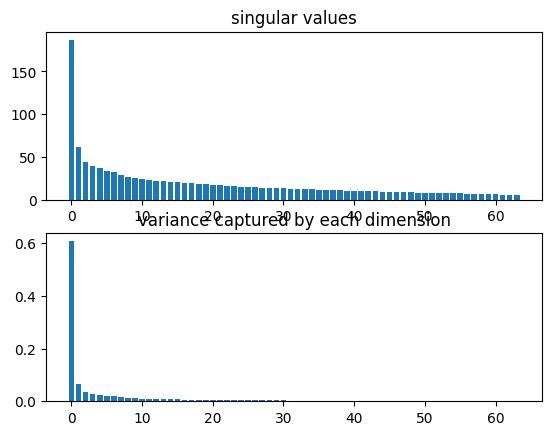

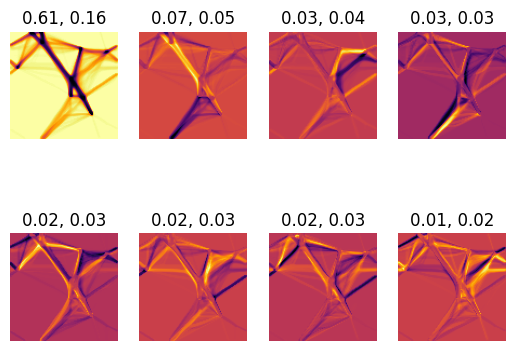

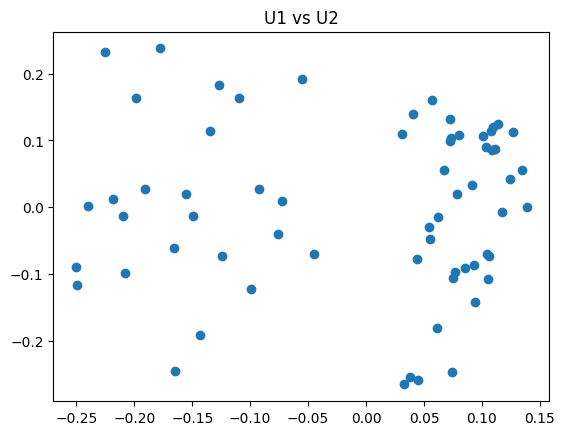

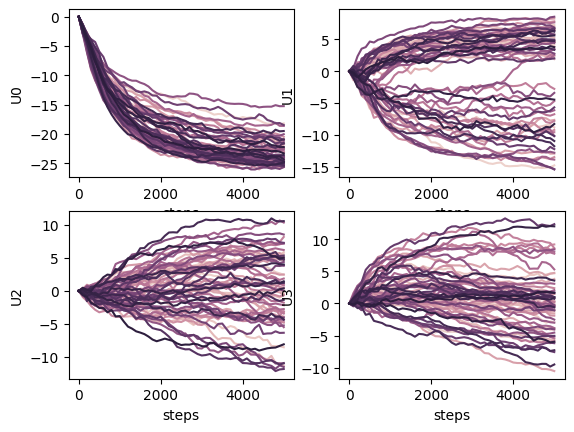

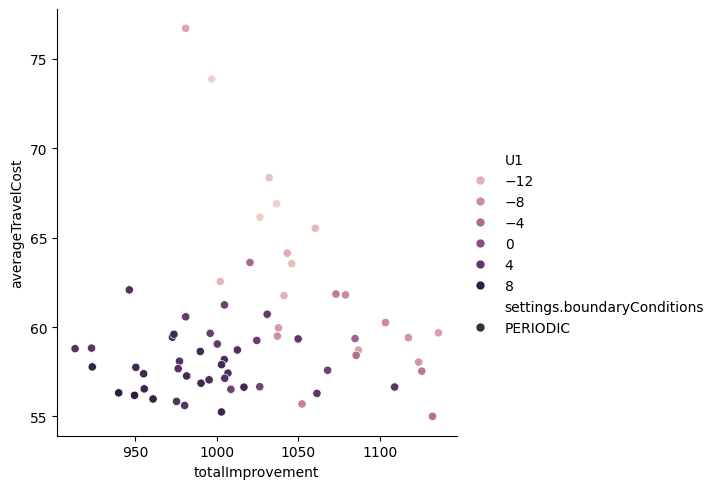

1  ---------  0.001 10 1 SOLID


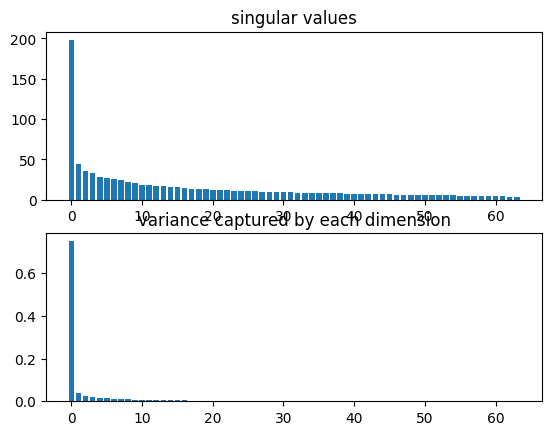

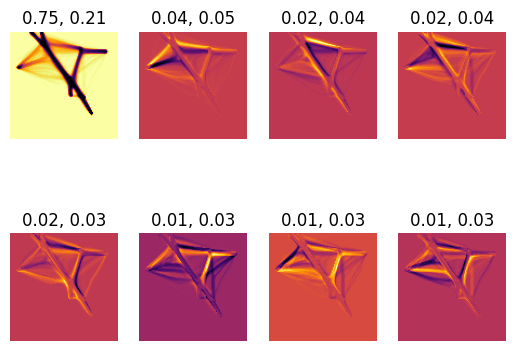

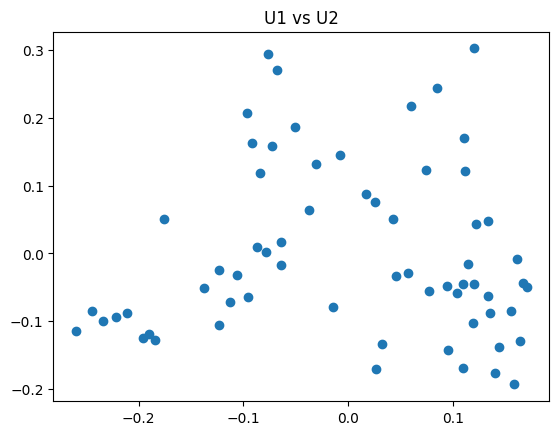

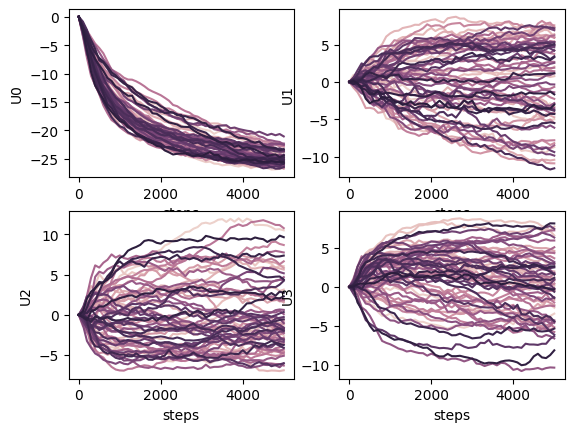

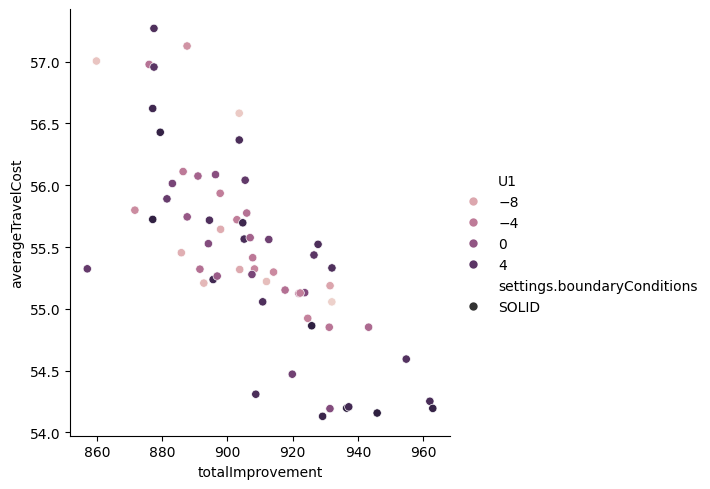

2  ---------  0.001 10 2 PERIODIC


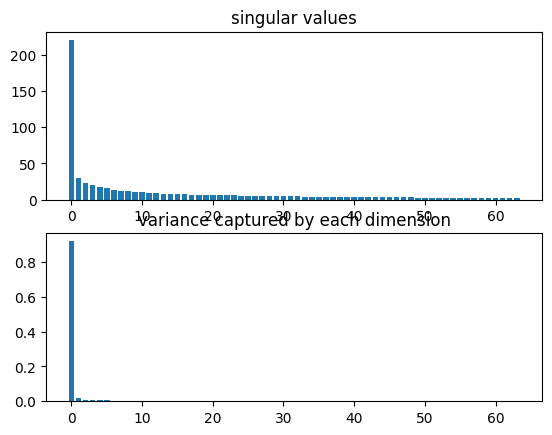

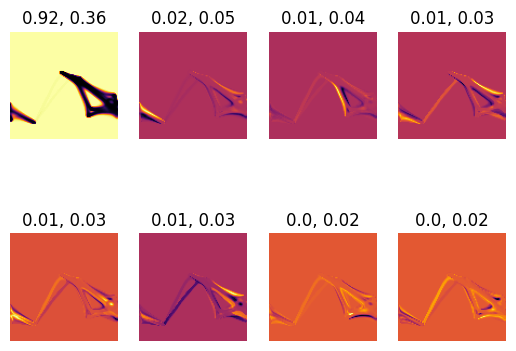

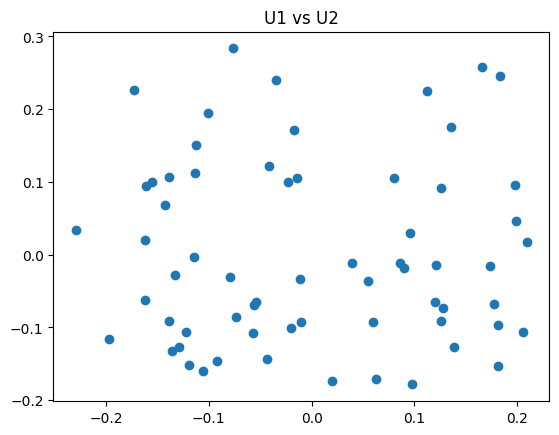

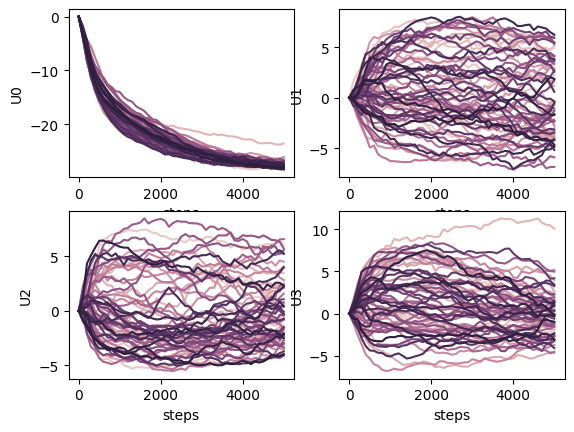

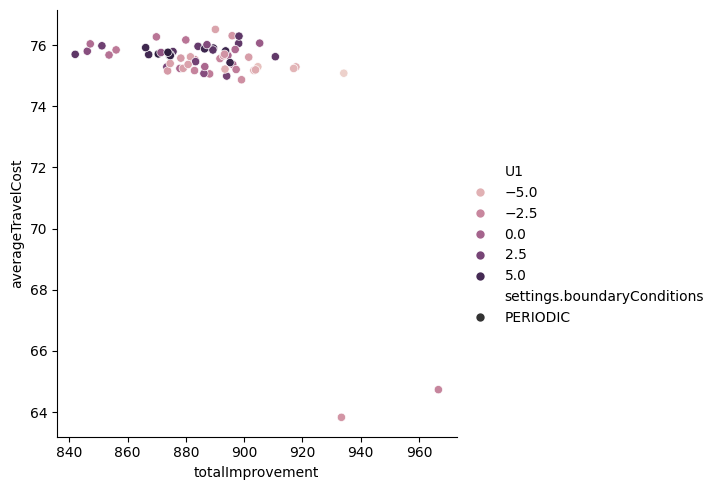

3  ---------  0.001 10 2 SOLID


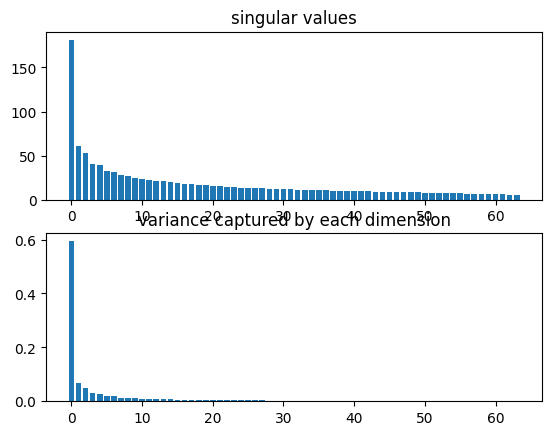

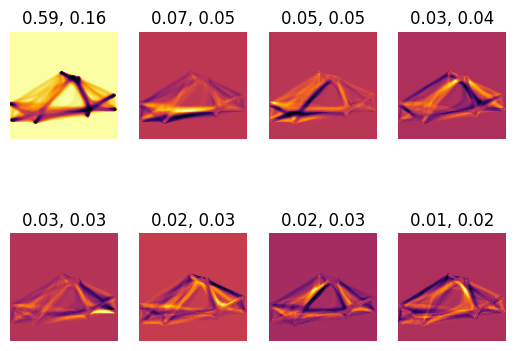

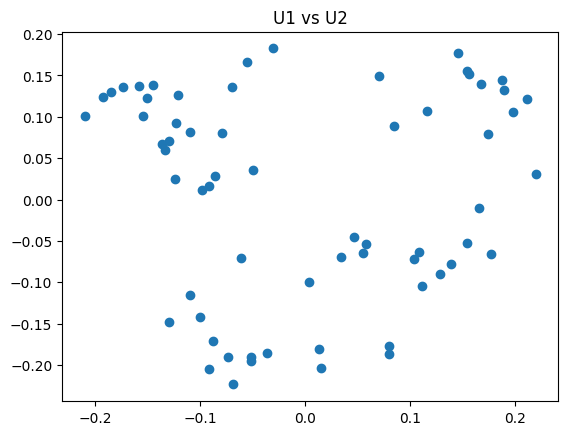

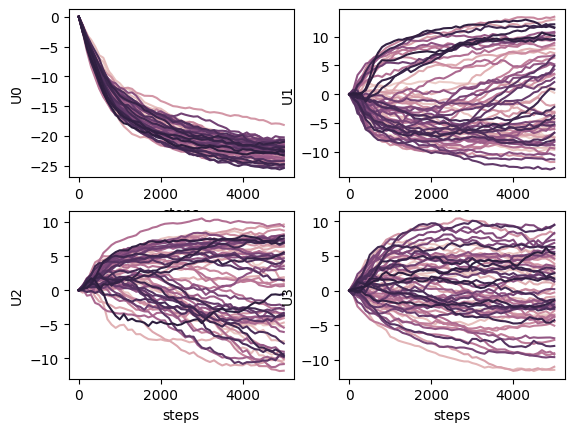

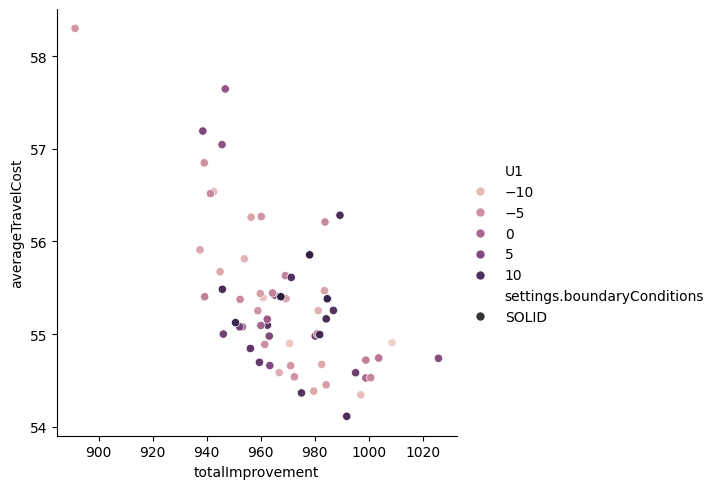

4  ---------  0.001 10 3 PERIODIC


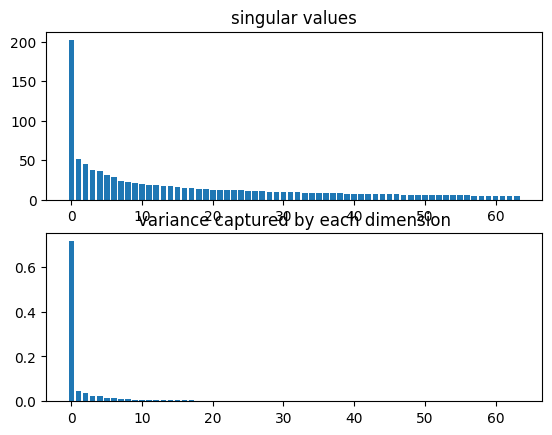

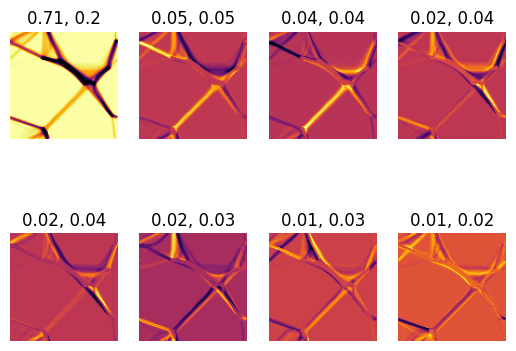

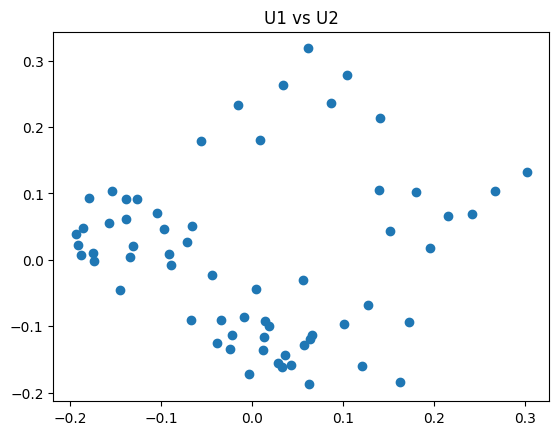

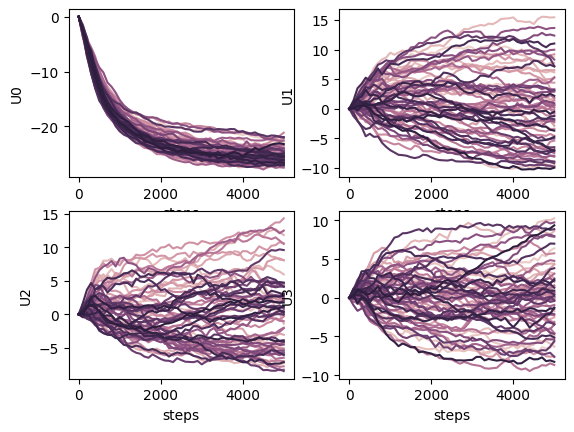

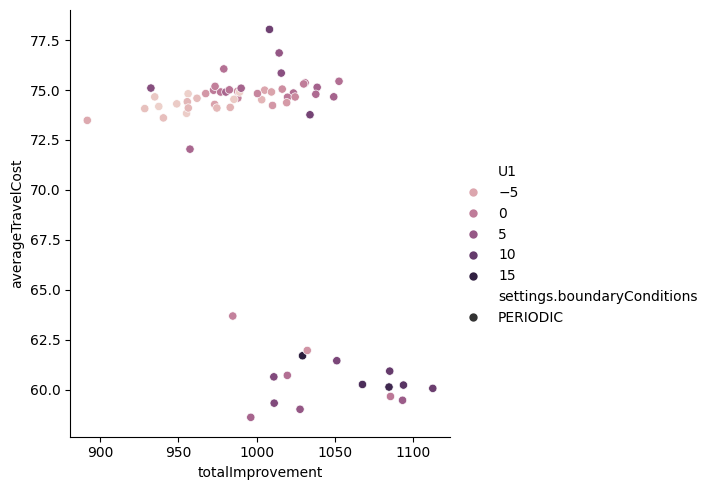

5  ---------  0.001 10 3 SOLID


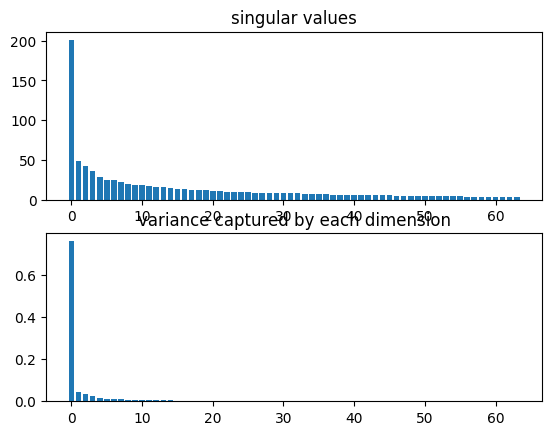

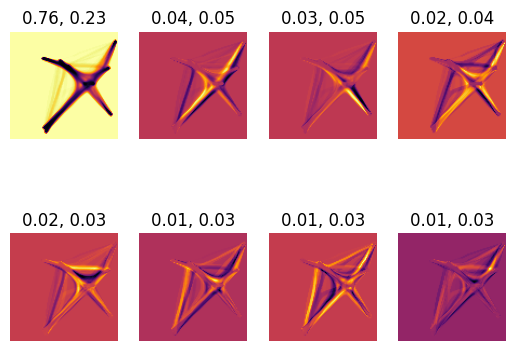

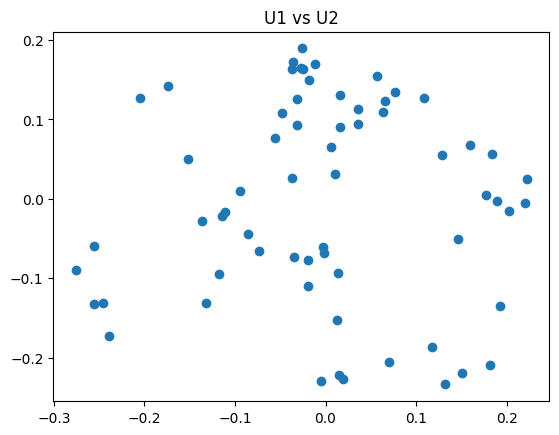

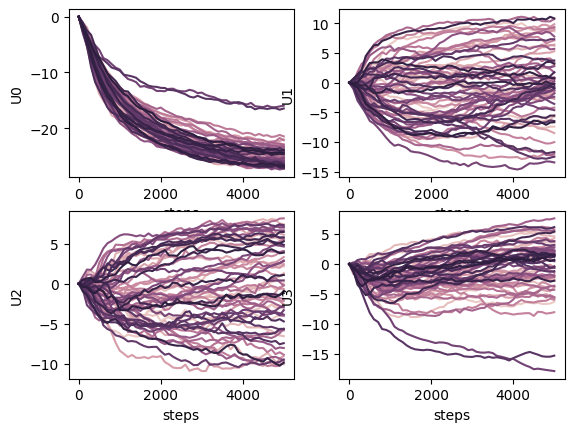

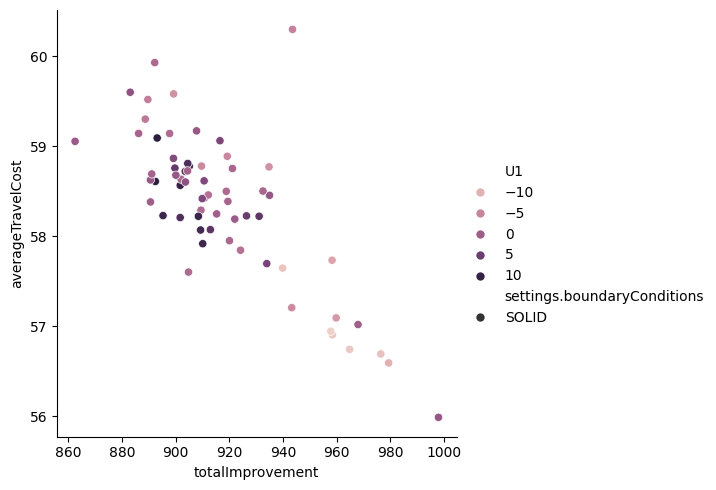

6  ---------  0.001 10 4 PERIODIC


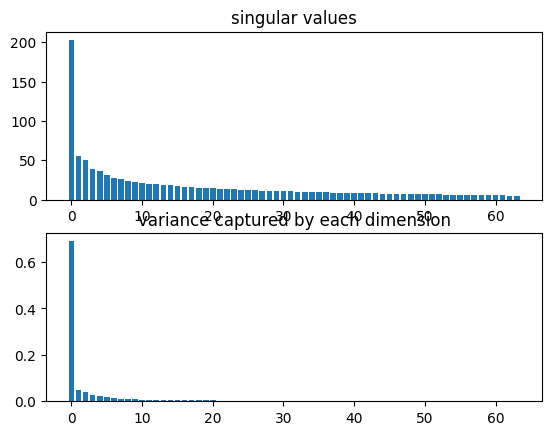

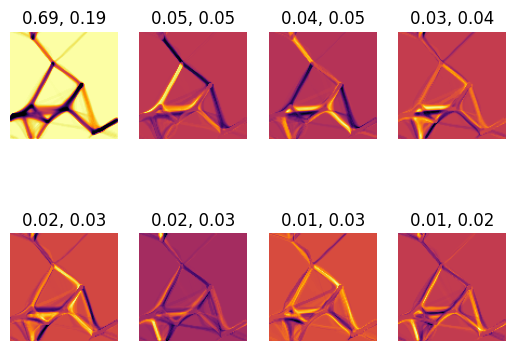

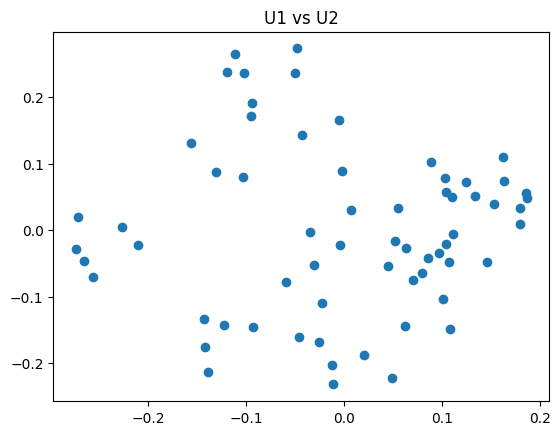

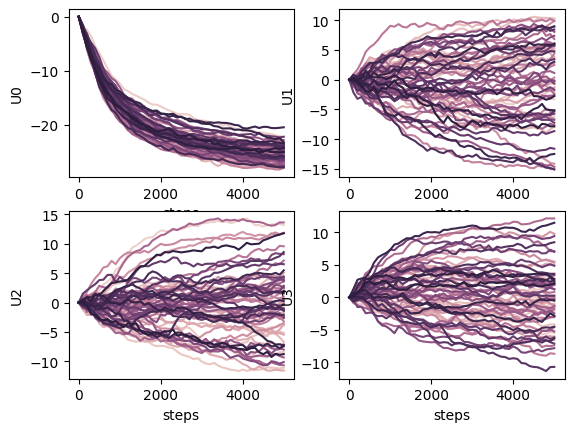

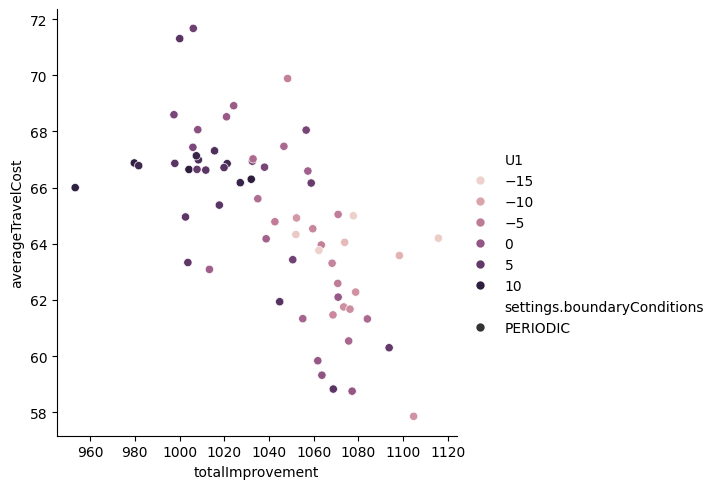

7  ---------  0.001 10 4 SOLID


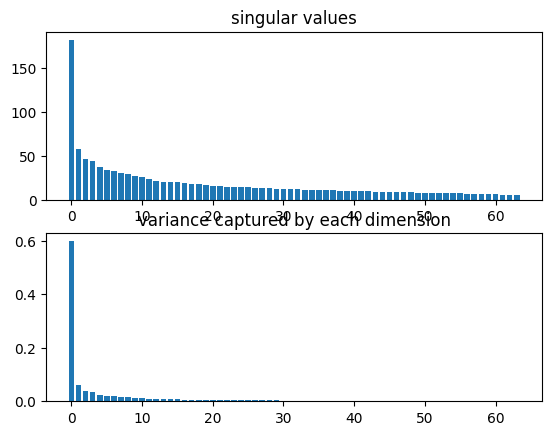

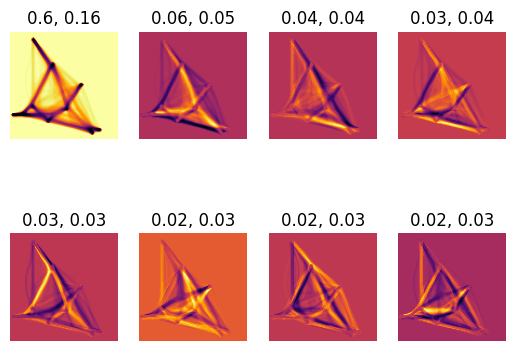

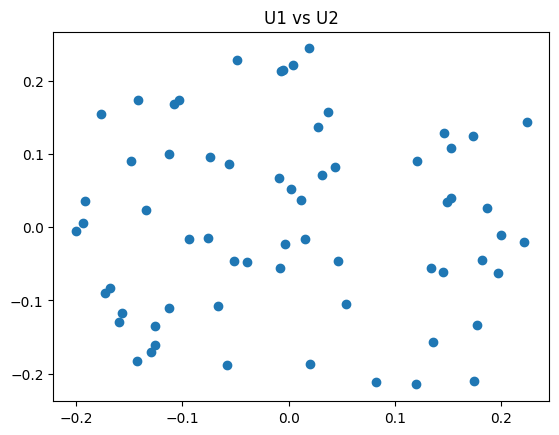

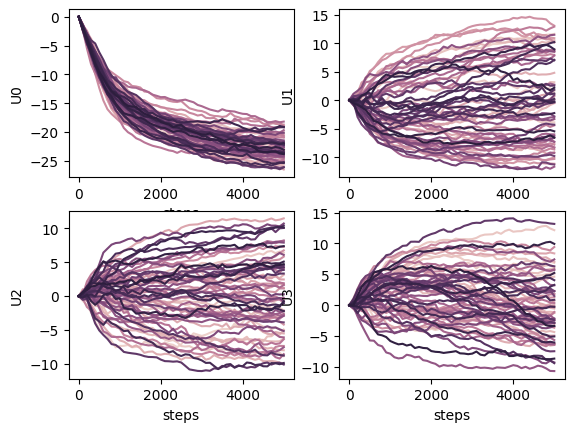

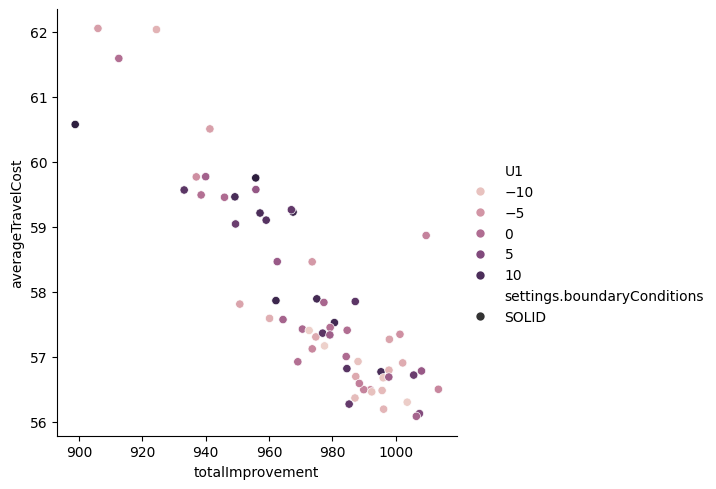

8  ---------  0.001 20 1 PERIODIC


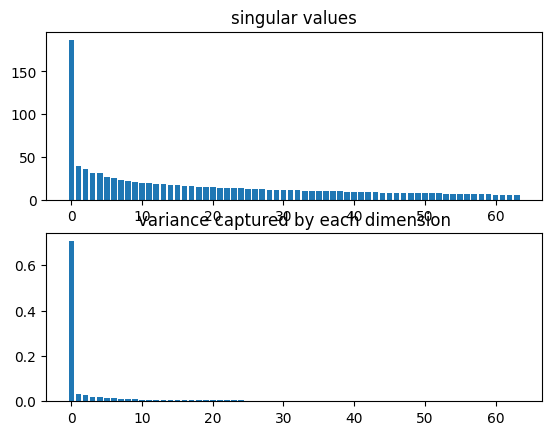

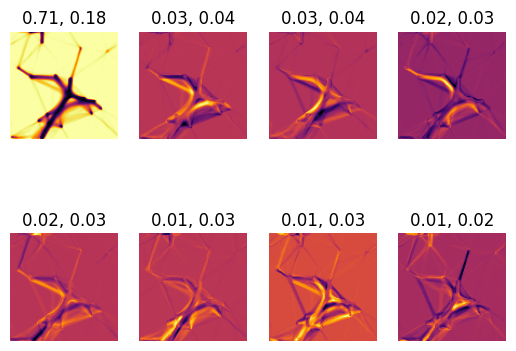

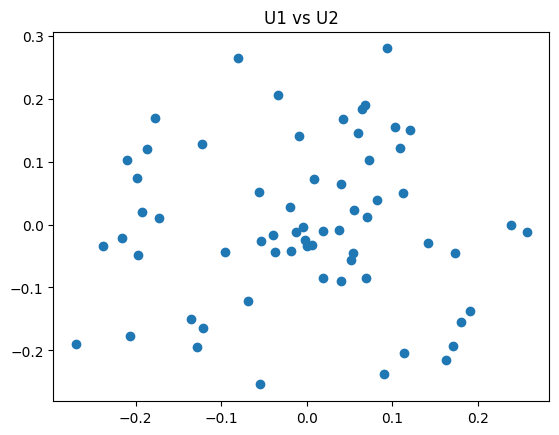

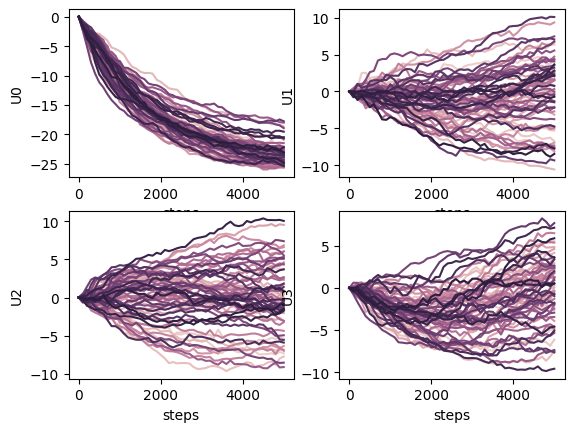

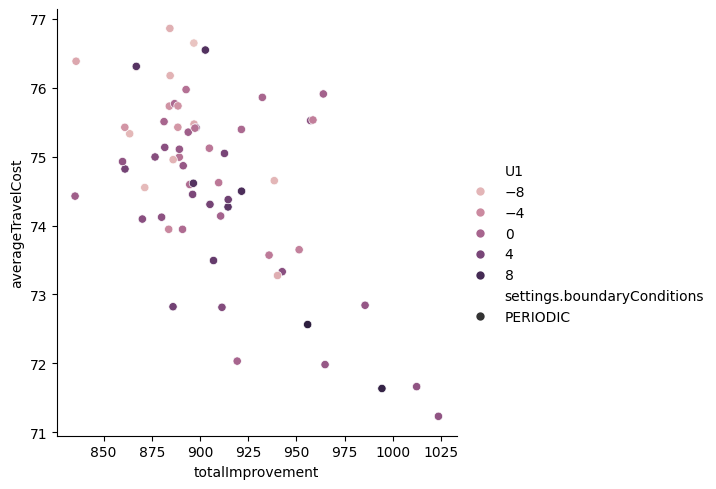

9  ---------  0.001 20 1 SOLID


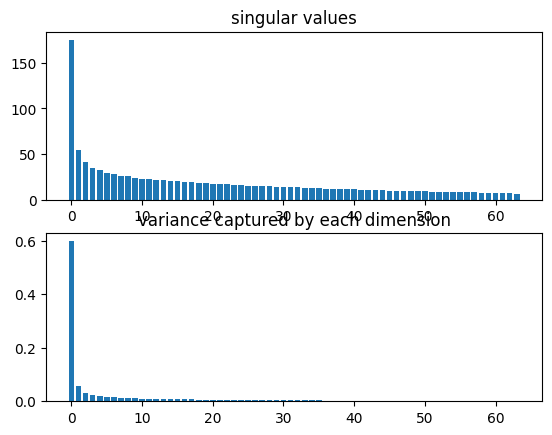

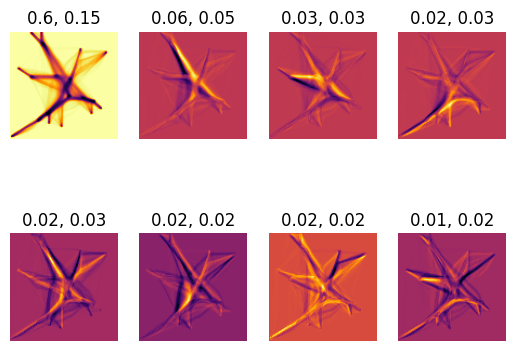

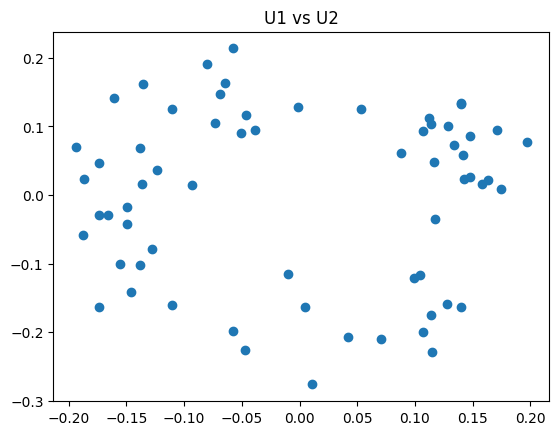

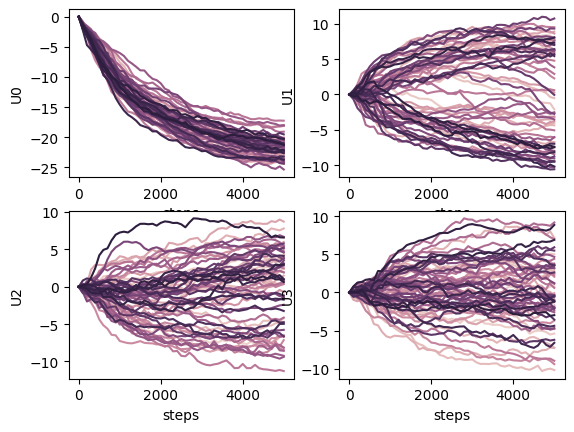

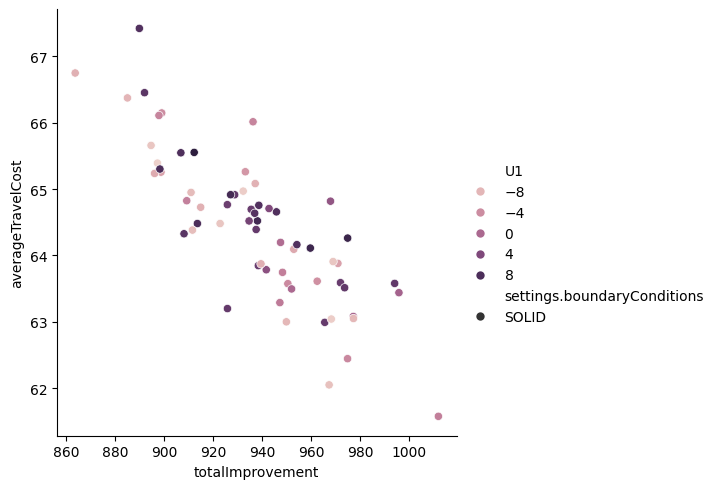

10  ---------  0.001 20 2 PERIODIC


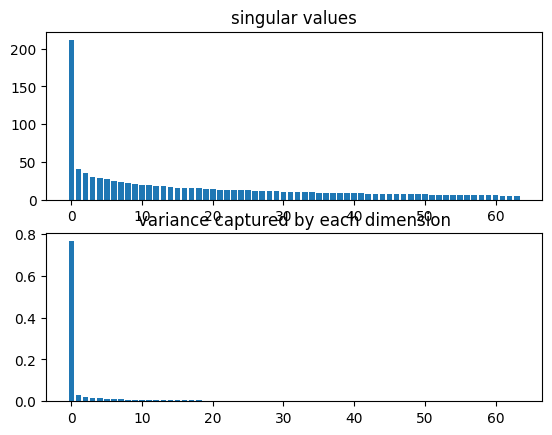

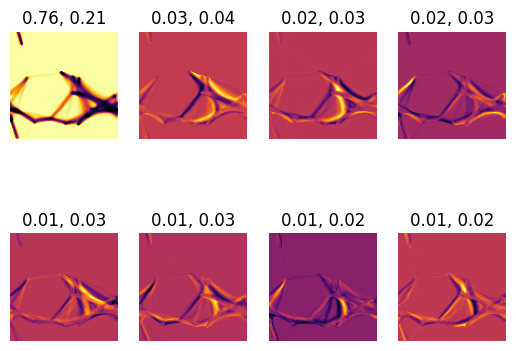

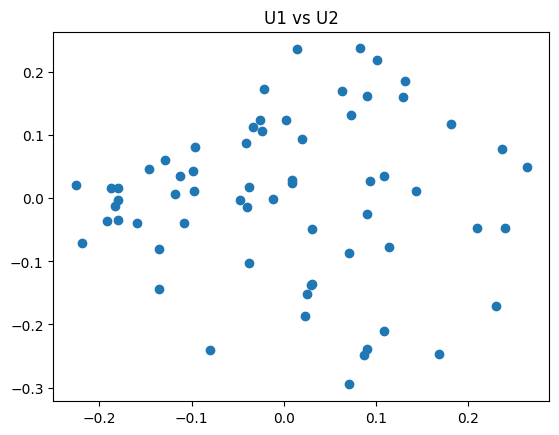

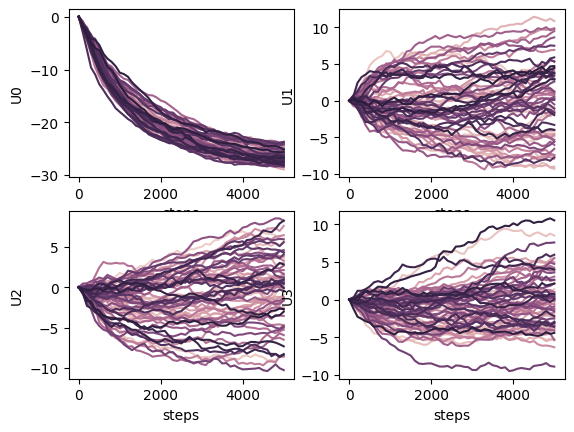

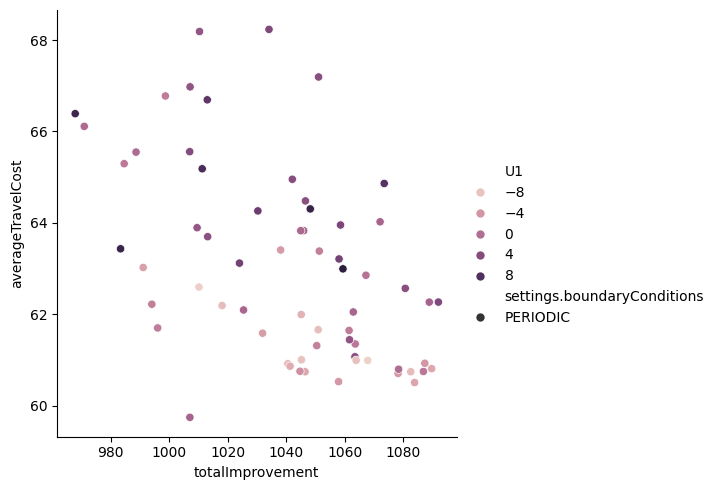

11  ---------  0.001 20 2 SOLID


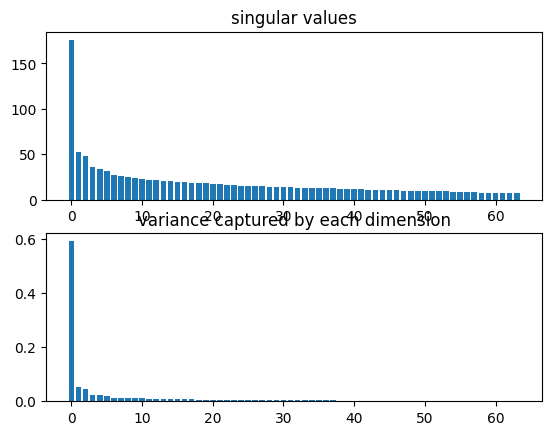

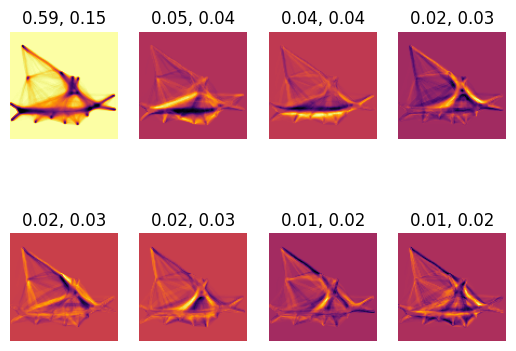

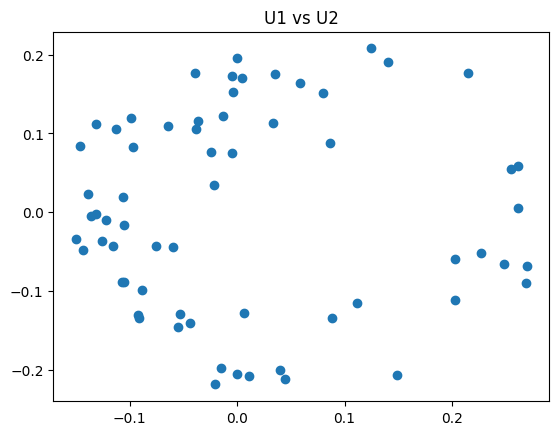

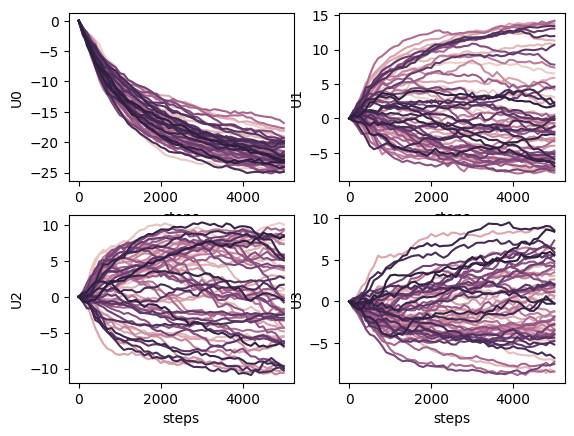

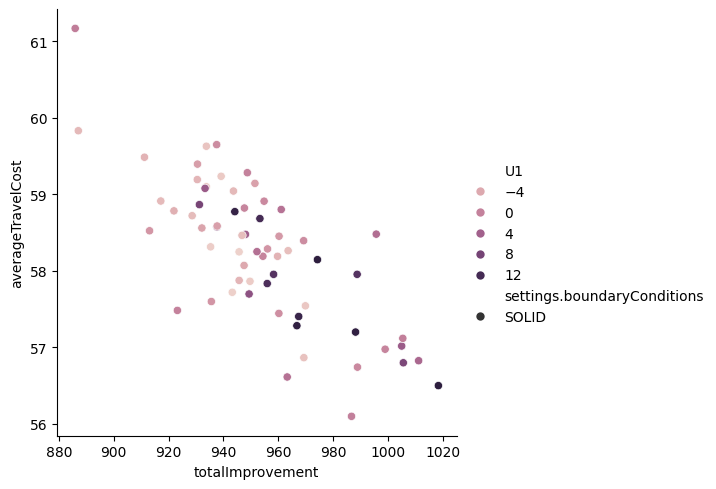

12  ---------  0.001 20 3 PERIODIC


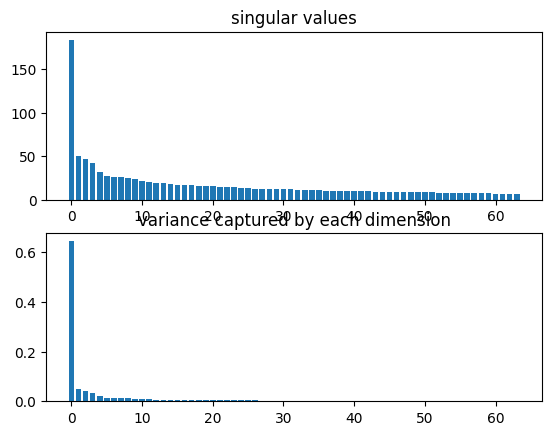

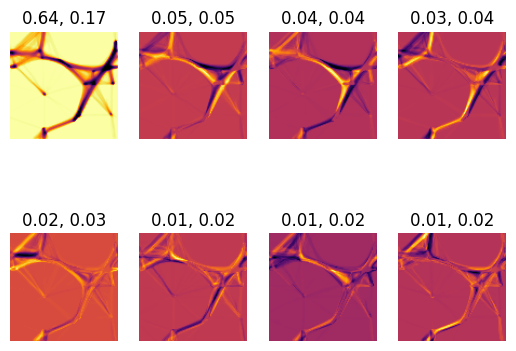

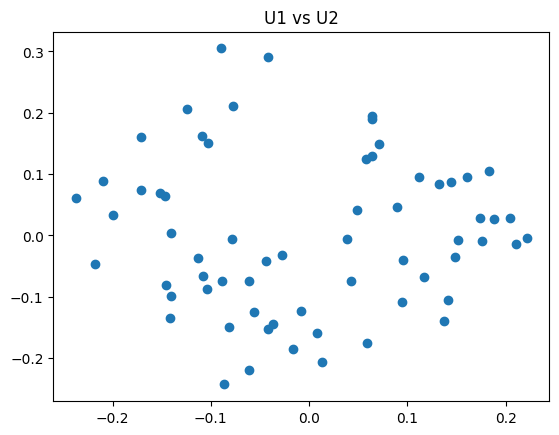

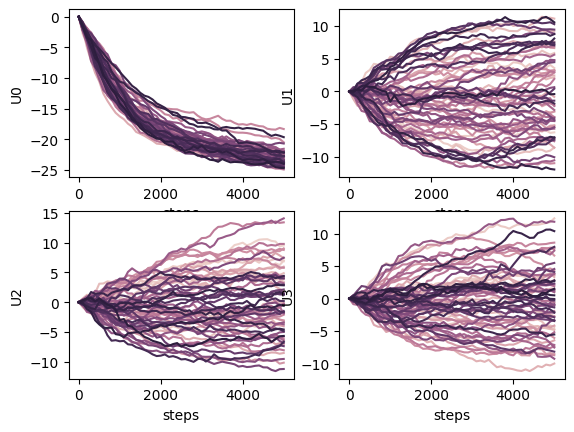

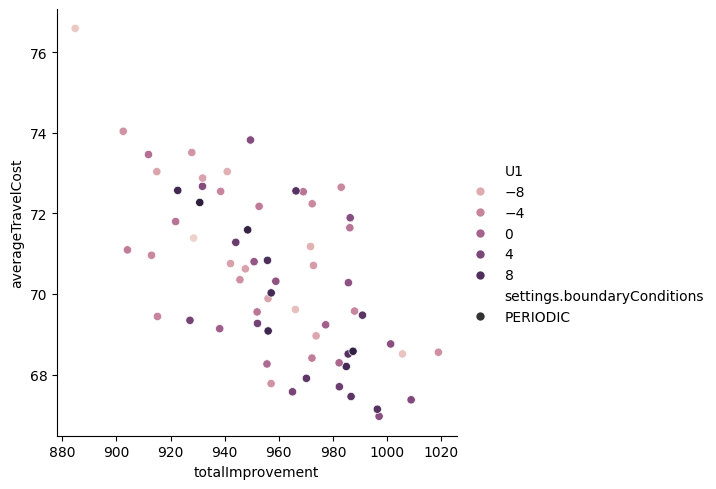

13  ---------  0.001 20 3 SOLID


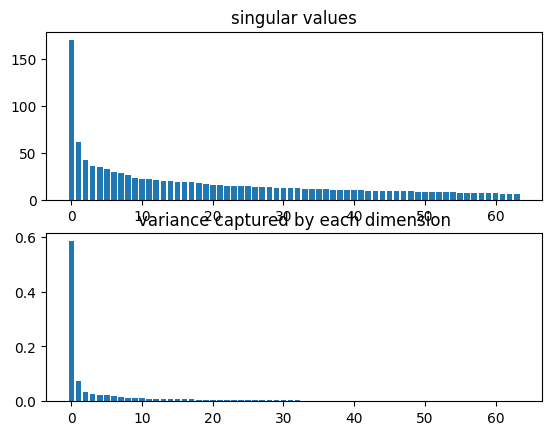

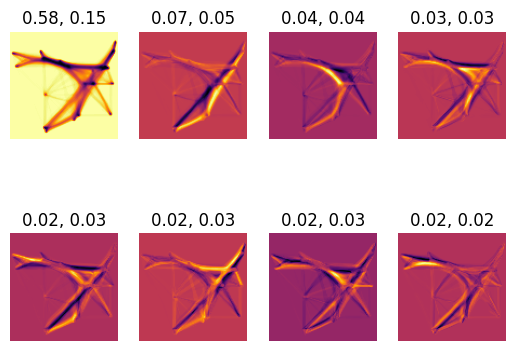

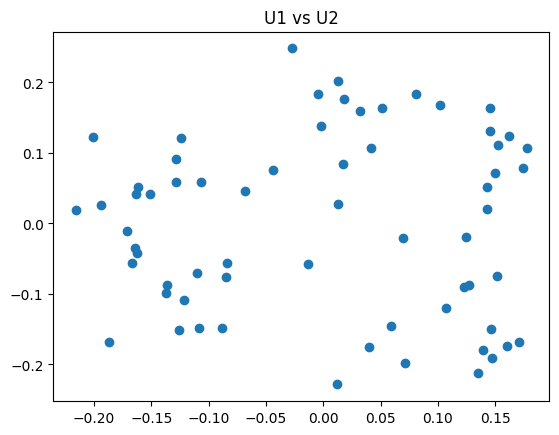

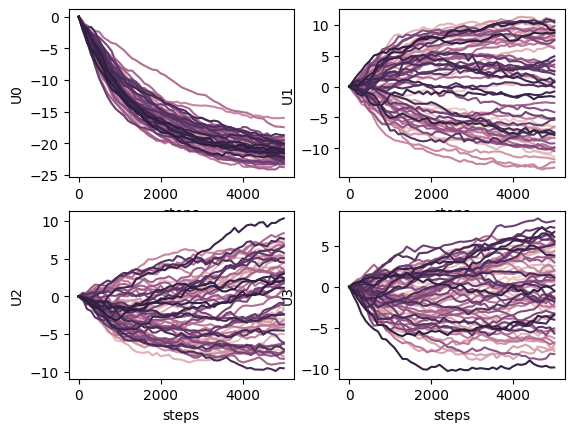

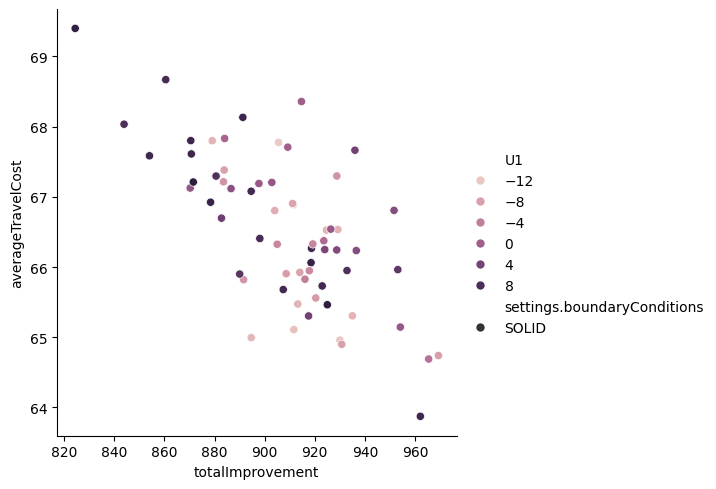

14  ---------  0.001 20 4 PERIODIC


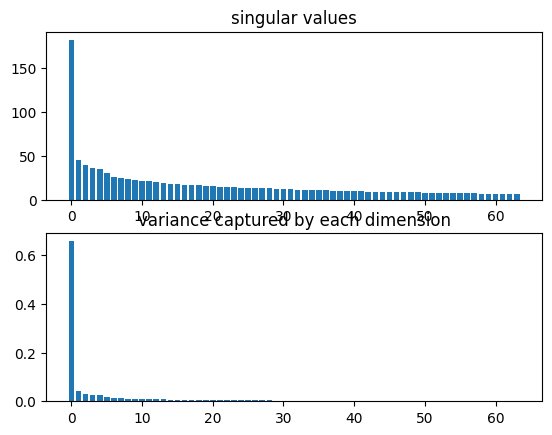

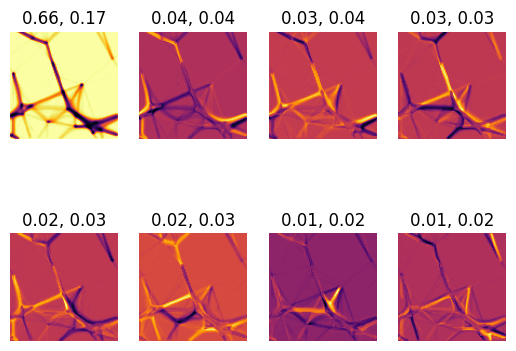

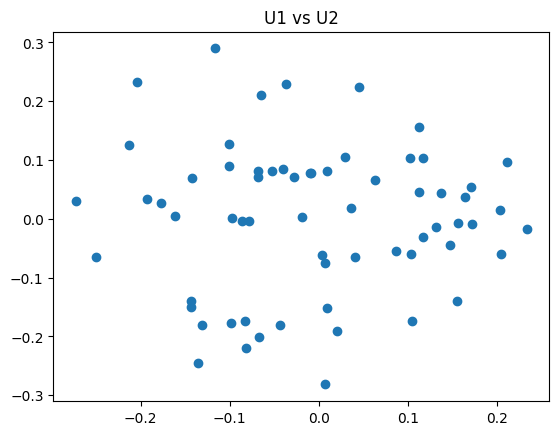

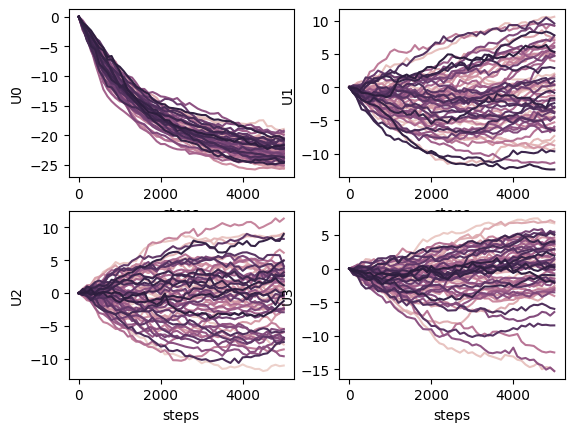

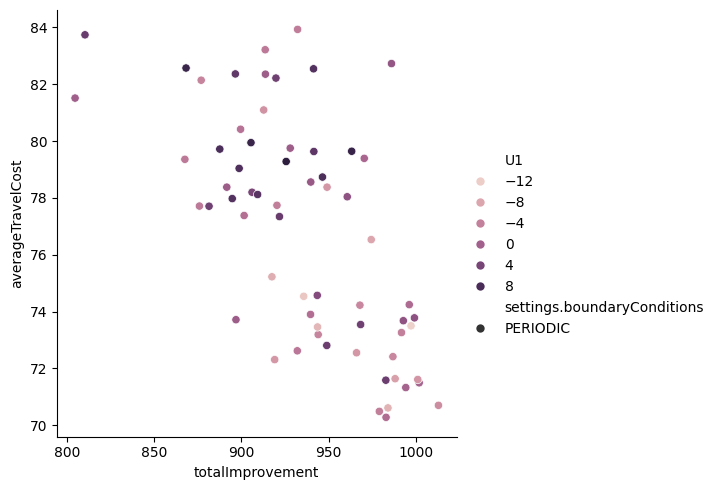

15  ---------  0.001 20 4 SOLID


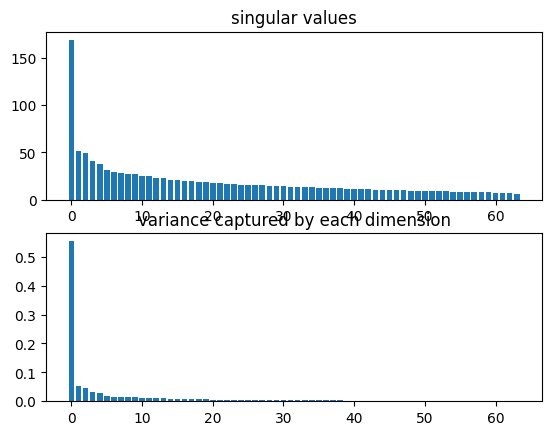

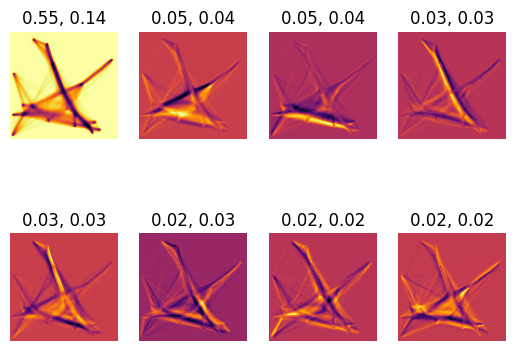

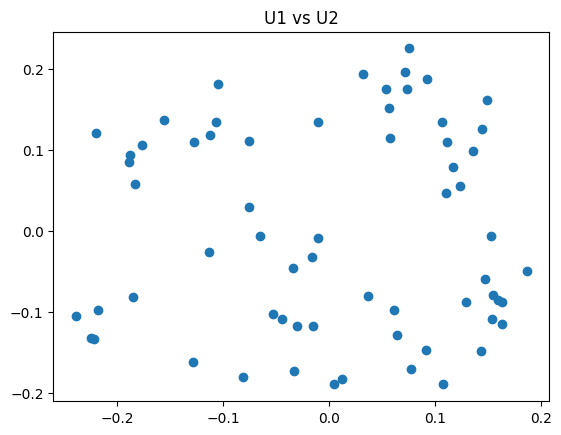

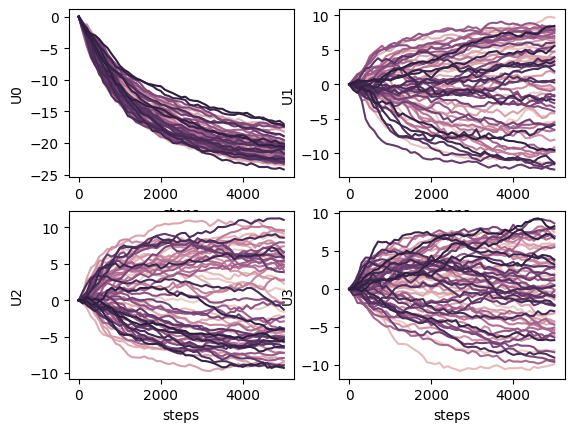

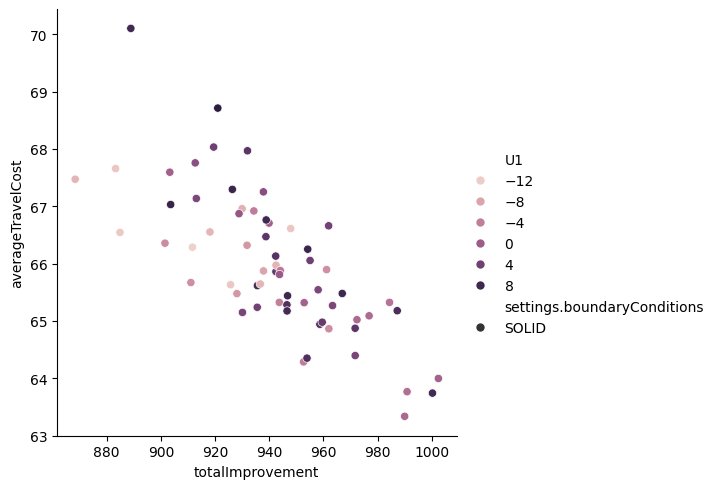

In [39]:
recoveries = [0.001]
numLocations = [10, 20]
seedLocations = [1, 2, 3, 4]
boundaryConditions = ["PERIODIC", "SOLID"]

i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                
                print(i, " --------- ", recovery, numLocation, seedLocation, boundaryCondition)
                _all = df[
                    # (df["steps"] >= 4000) &
                    (df["settings.patchRecovery"] == recovery) &
                    # (df["ratio"] == 100.0) &
                    (df["settings.numLocations"] == numLocation) &
                    (df["settings.randomSeedLocations"] == seedLocation) &
                    (df["settings.boundaryConditions"] == boundaryCondition)
                ].copy()

                U, S, Vh = svd(_all, STEPS, plot=True, dynamics=True)
                s = S**2/sum(S**2)

                i += 1


# Summary of results

This is probably the clearest example of two distinct solutions:

periodic conditions, 10 locations, random seed 1.

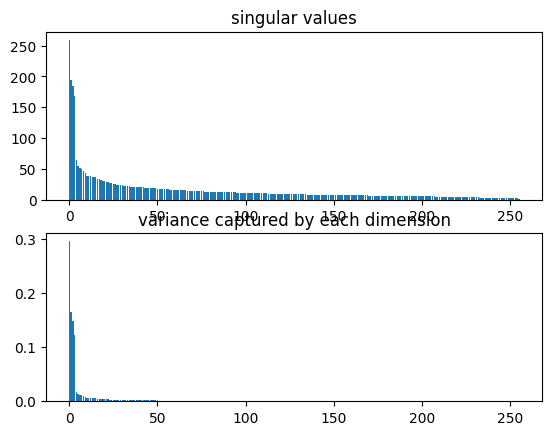

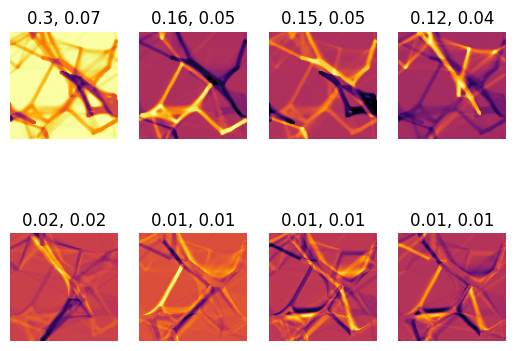

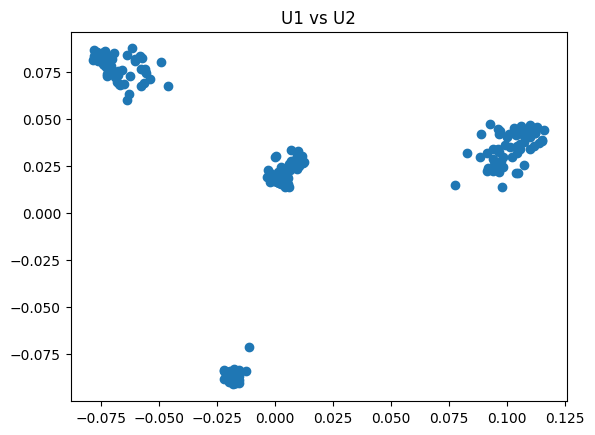

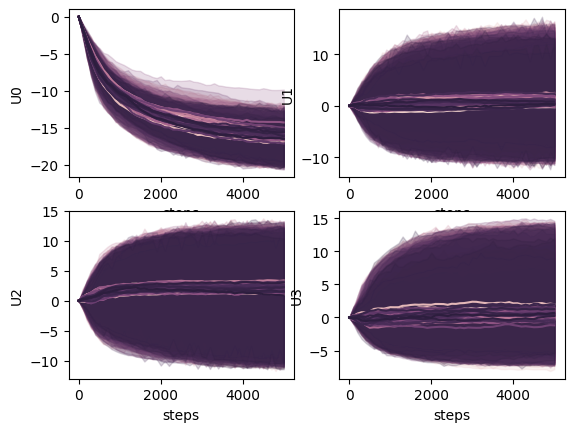

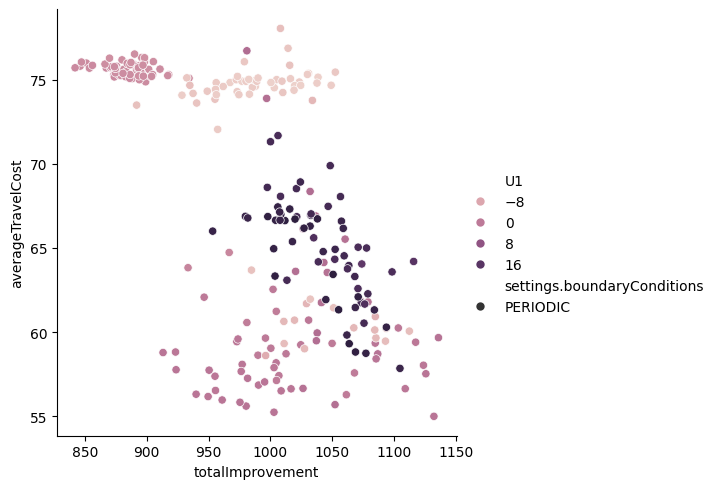

In [40]:
_all = df[
    # (df["ratio"] == 100.0) &
    (df["settings.boundaryConditions"] == "PERIODIC") &
    (df["settings.numLocations"] == 10) &
    # (df["settings.randomSeedLocations"] == 1) &
    (df["settings.patchRecovery"] == 0.001) &
    (df["settings.recoveryLogic"] == "LINEAR")
].copy()

# _finals = _all[_all["steps"] == 5000]

# util.plot_patches(_finals)
U, S, Vh = svd(_all, STEPS)

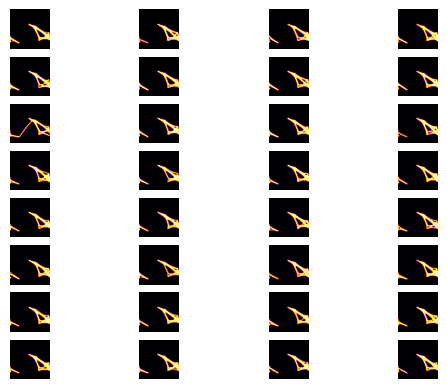

UnboundLocalError: cannot access local variable 'ax' where it is not associated with a value

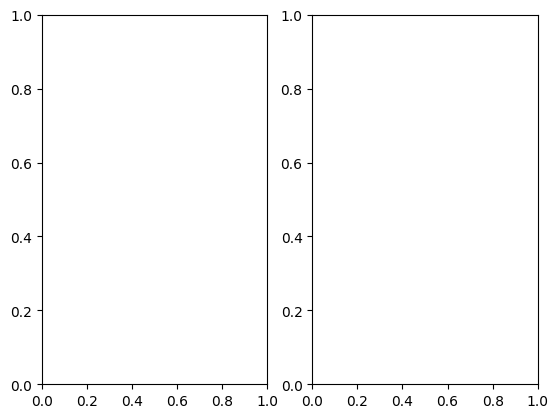

In [27]:
_all = df[
    # (df["ratio"] == 100.0) &
    (df["settings.boundaryConditions"] == "PERIODIC") &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 2) &
    (df["settings.patchRecovery"] == 0.001) &
    (df["settings.recoveryLogic"] == "LINEAR")
].copy()

_finals = _all[_all["steps"] == STEPS]
util.plot_patches(_finals)
U, S, Vh = svd(_all, STEPS)

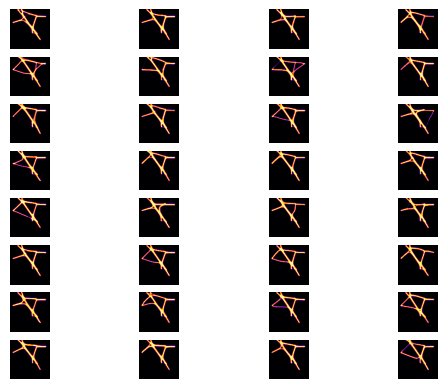

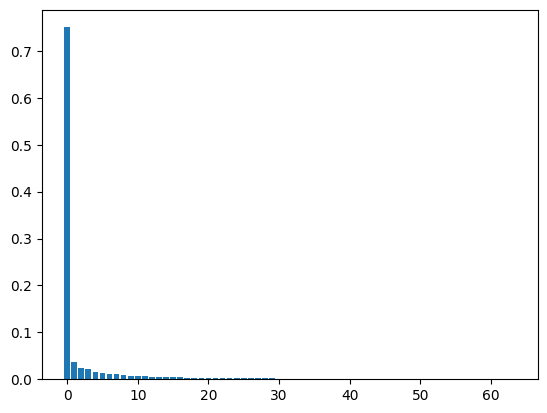

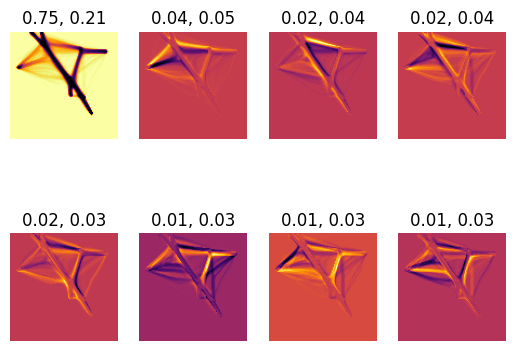

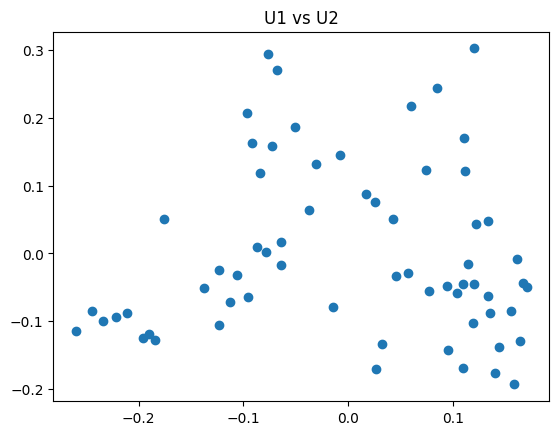

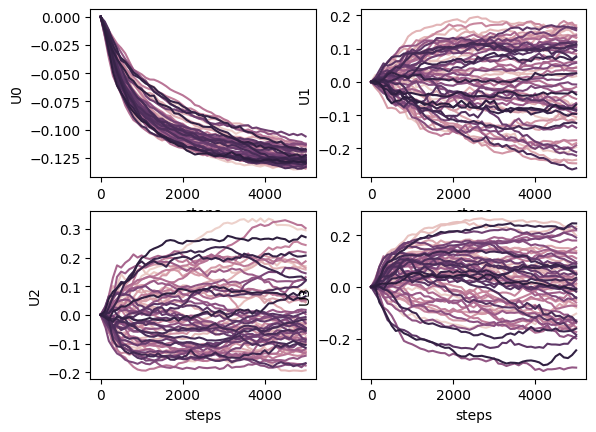

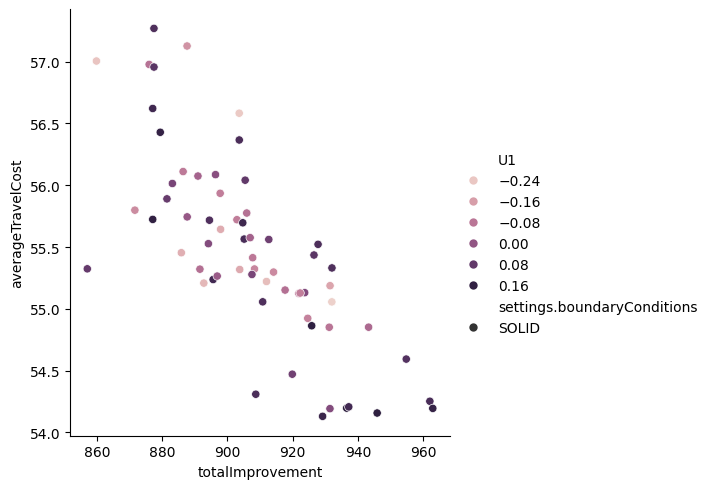

In [13]:
_all = df[
    # (df["ratio"] == 100.0) &
    (df["settings.boundaryConditions"] == "SOLID") &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 1) &
    (df["settings.patchRecovery"] == 0.001) &
    (df["settings.recoveryLogic"] == "LINEAR")
].copy()

_finals = _all[_all["steps"] == STEPS]
util.plot_patches(_finals)
U, S, Vh = util.svd(_all, STEPS)

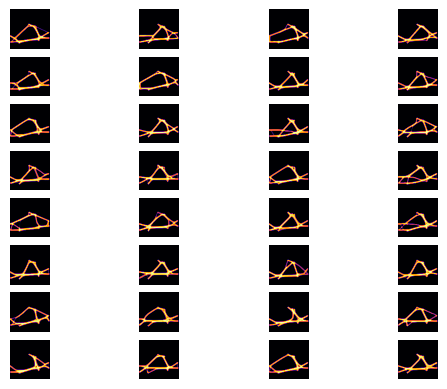

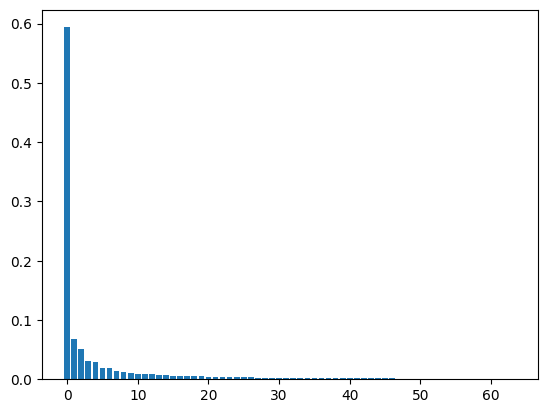

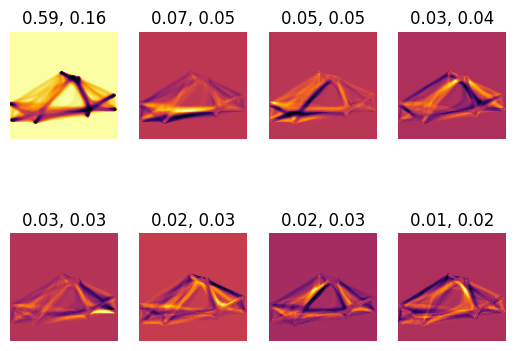

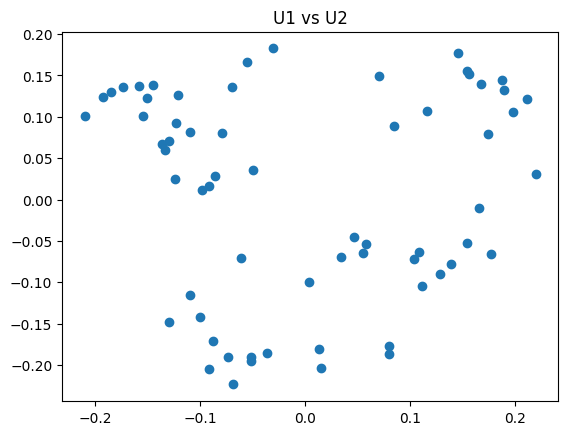

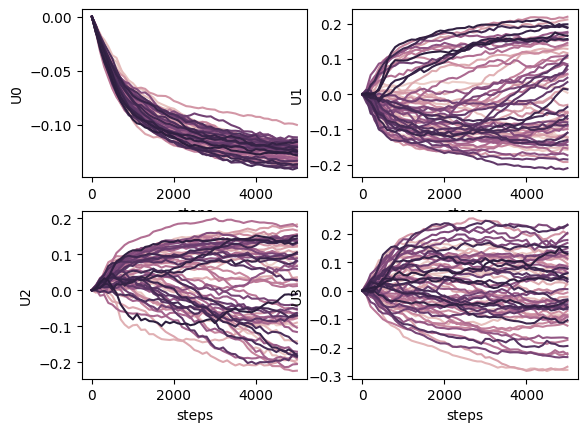

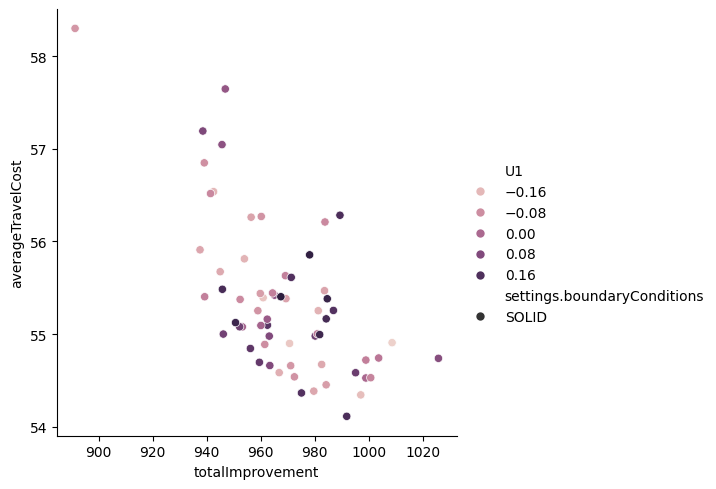

In [14]:
_all = df[
    # (df["ratio"] == 100.0) &
    (df["settings.boundaryConditions"] == "SOLID") &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 2) &
    (df["settings.patchRecovery"] == 0.001) &
    (df["settings.recoveryLogic"] == "LINEAR")
].copy()

_finals = _all[_all["steps"] == STEPS]
util.plot_patches(_finals)
U, S, Vh = util.svd(_all, STEPS)